# Cifar10
Case study with Convolutional Neural Network to demonstrate usage of TensorFlow 2.0 (Keras).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from time import localtime, strftime
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.0.0-alpha0'

## Preprocessing
Loading and exploring data, normalization and reshaping in preparation as input to a model.

In [2]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()
print( "X_train: {}".format(X_train.shape) )
print( "X_test:  {}".format(X_train.shape) )

X_train: (50000, 32, 32, 3)
X_test:  (50000, 32, 32, 3)


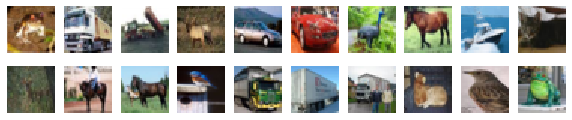

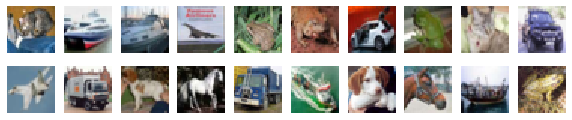

In [3]:
#explore dataset
fig, ax = plt.subplots(2,10, figsize=(10,2.0))
for (i,j) in [(i,j) for i in range(2) for j in range(10)]:
    ax[i,j].imshow(X_train[10*i+j,:,:])
    ax[i,j].axis('off')
plt.show()

#explore dataset
fig, ax = plt.subplots(2,10, figsize=(10,2.0))
for (i,j) in [(i,j) for i in range(2) for j in range(10)]:
    ax[i,j].imshow(X_test[10*i+j,:,:])
    ax[i,j].axis('off')
plt.show()

In [4]:
#normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

## Model Construction
Convolutional neural network.

### Architecture and Optimization Strategy
Sequential network with size-3 kernels and max pooling. Learning will use Adam optimizer, with sparse categorical cross entropy as loss and sparse categorical accuracy as performance metric.

[ https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy ]

In [5]:
#---[ Architecture ]------------------------------------------------------
#network type: a sequence of layers
model = tf.keras.models.Sequential()

#layer 1: 32 filters of size 3 with same padding and relu activation
model.add( tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]) )

#layer 2: ìd. and max pooling
model.add( tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu") )
model.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid') )

#layer 3: 64 filters of size 3
model.add( tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu") )

#layer 4: íd and max pooling
model.add( tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu") )
model.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid') )

#layer 5: flattening
model.add( tf.keras.layers.Flatten() )

#layer 6: fully connected layer
model.add( tf.keras.layers.Dense(units=128, activation='relu') )

#output layer
model.add( tf.keras.layers.Dense(units=10, activation='softmax') )


#---[ Optimization Strategy ]------------------------------------------------------
##initial_learning_rate = 0.1
##
##lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
##    initial_learning_rate,
##    decay_steps=1000,
##    decay_rate=0.96,
##    staircase=True)
##
##Adamdecay = tf.keras.optimizers.Adam(learning_rate=lr_schedule)*/
##model.compile( optimizer=Adamdecay, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'] )

model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'] )


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

### Training
Five epochs in batch mode.

In [7]:
#validation set
X_val = X_train[-10000:]
y_val = y_train[-10000:]
X_train = X_train[:-10000]
y_train = y_train[:-10000]

tensorboard_cbk = tf.keras.callbacks.TensorBoard(
  log_dir='./cifar10_tb/' + strftime( "%Y%b%dT%Hh%M", localtime() ).lower() + '/',
  histogram_freq=1,  # How often to log histogram visualizations
  embeddings_freq=1,  # How often to log embedding visualizations
  update_freq='epoch' # How often to write logs (default: once per epoch)
)

numepochs = 15 #increase to 15
history = model.fit( X_train, y_train,
                     epochs=numepochs,
                     validation_data=(X_val,y_val))#,
                     #callbacks=[tensorboard_cbk] )

W0814 17:29:40.387096 140355526731584 callbacks.py:1194] Embeddings will be ignored in TensorFlow 2.0 for the `TensorBoard` Callback.


Train on 30000 samples, validate on 10000 samples
Epoch 1/15
30000/30000 [==============================] - 53s 2ms/sample - loss: 1.1704 - sparse_categorical_accuracy: 0.5794 - val_loss: 1.0348 - val_sparse_categorical_accuracy: 0.6370
Epoch 2/15
30000/30000 [==============================] - 57s 2ms/sample - loss: 0.9025 - sparse_categorical_accuracy: 0.6806 - val_loss: 0.9840 - val_sparse_categorical_accuracy: 0.6563
Epoch 3/15
30000/30000 [==============================] - 55s 2ms/sample - loss: 0.7511 - sparse_categorical_accuracy: 0.7371 - val_loss: 0.8845 - val_sparse_categorical_accuracy: 0.6966
Epoch 4/15
30000/30000 [==============================] - 56s 2ms/sample - loss: 0.6272 - sparse_categorical_accuracy: 0.7784 - val_loss: 0.8513 - val_sparse_categorical_accuracy: 0.7150
Epoch 5/15
30000/30000 [==============================] - 57s 2ms/sample - loss: 0.4970 - sparse_categorical_accuracy: 0.8262 - val_loss: 0.9533 - val_sparse_categorical_accuracy: 0.6987
Epoch 6/15
3000

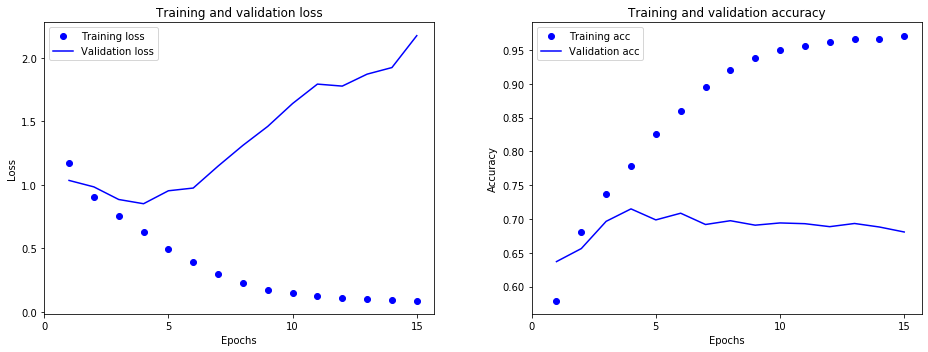

In [8]:
history_dict = history.history
#print(history_dict.keys())

acc = history_dict['sparse_categorical_accuracy']
val_acc = history_dict['val_sparse_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

fig, axes = plt.subplots(1,2, figsize=(13,5))
axes[0].set_title('Training and validation loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].plot(epochs, loss, 'bo', label='Training loss')
axes[0].plot(epochs, val_loss, 'b-', label='Validation loss')
axes[0].set_xticks([i for i in range(0,len(epochs)+1)])
axes[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axes[0].legend()

axes[1].set_title('Training and validation accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].plot(epochs, acc, 'bo', label='Training acc')
axes[1].plot(epochs, val_acc, 'b', label='Validation acc')
axes[1].set_xticks([i for i in range(0,len(epochs)+1)])
axes[1].xaxis.set_major_locator(plt.MultipleLocator(5))
axes[1].legend()

fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.show()

## Evaluation and Prediction
Finally, the (approximated) model is evaluated using the test dataset.

In [9]:
test_loss, test_accuracy = model.evaluate( X_test, y_test )

print( "Test accuracy: {}".format(test_accuracy) )

10000/10000 [==============================] - 3s 305us/sample - loss: 2.1304 - sparse_categorical_accuracy: 0.6823
Test accuracy: 0.6822999715805054


### If all went well...
...save the model.

In [ ]:
#save architecture
model_json = model.to_json()
with open("cifar_model.json","w") as jsonfile:
    jsonfile.write(model_json)

#save weights
model.save_weights("cifar_model.h5")